In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve




In [2]:
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data['age_groups'] = pd.cut(data['age'],bins = [0,12,19,29,39,54,64,float('inf')],labels = ['child','teenager','young adult','adult','midle aged','old','senior']).astype('O')

In [4]:
data['bmi_groups'] = pd.cut(data['bmi'],bins = [0,18.4,24.9,29.9,float('inf')],labels = ['under weight','normal','overweight','obese']).astype('O')

In [5]:
data['gender'] = np.where(data['gender'].str.lower() == 'female', 0, 1)
data = pd.get_dummies(data=data,columns=['smoking_history','age_groups','bmi_groups'],drop_first=True,dtype=int)
data.head() 

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,...,smoking_history_not current,age_groups_child,age_groups_midle aged,age_groups_old,age_groups_senior,age_groups_teenager,age_groups_young adult,bmi_groups_obese,bmi_groups_overweight,bmi_groups_under weight
0,0,80.0,0,1,25.19,6.6,140,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
X = data.drop(['diabetes'],axis=1).values
y = data['diabetes'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
rf = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=15)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.9719333333333333


In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Accuracy: 0.9719
Precision: 0.9893
Recall: 0.6808
F1 Score: 0.8065
ROC AUC Score: 0.9718


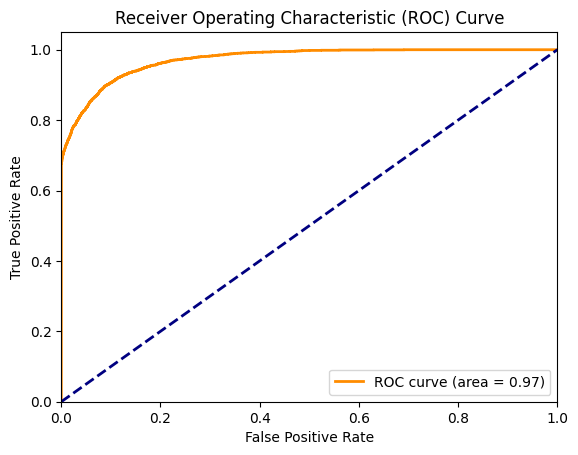

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


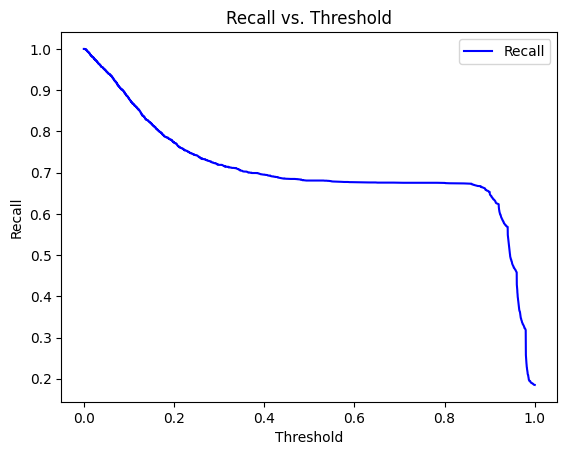

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(thresholds, recall[:-1], 'b-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold')
plt.legend()
plt.show()
